<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
customers = pd.read_csv('../Data/Wholesale customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
# Your code here:
customers.columns   # se observan las columnas

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
# No habría que cmabiar ningún tipo de dato, son todo datos cuantitativos con tipos correctos
# Tenemos 440 entradas (filas) y ningún dato nulo

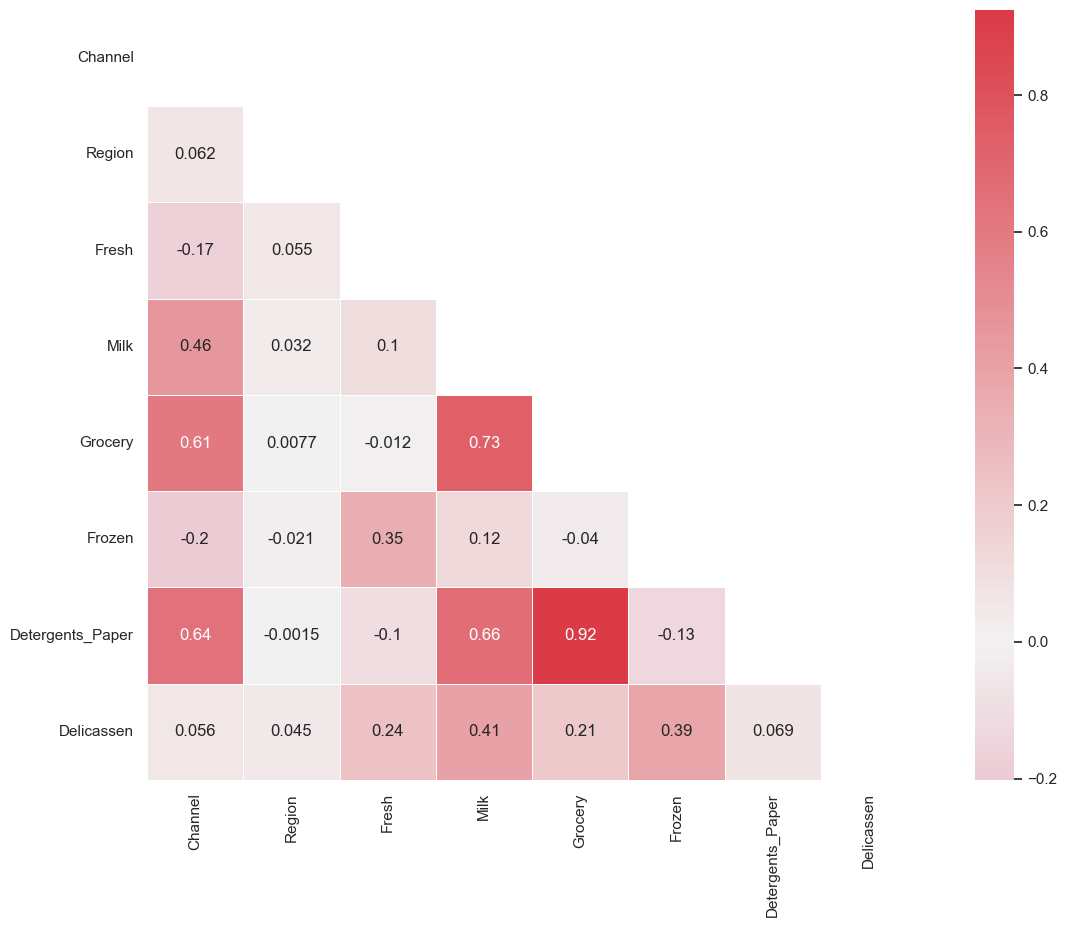

In [9]:
# Vamos a comprobar la correlación entre columnas. Si hubiera dos que tuvieran una muy alta correlación (>0.95) borraríamos una de las dos para no enmarronar ek modelo
plt.figure(figsize=(15, 10)) # 150x100 pixeles

sns.set(style='white')

mask = np.triu(np.ones_like(customers.corr(), dtype=bool)) # creamos una máscara para no mostrar las correlaciones dos veces

cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(customers.corr(),
            mask = mask,
            cmap = cmap,
            center = 0,
            square = True,
            annot = True,
            linewidth = 0.5);

In [11]:
# Tenemos una alta correlación entre Detergents_Paper y Grocery así que vamos a deshacernos de la columna de Detergents_Paper por considerar Grocery más importante.
customers_clean = customers.drop(columns='Detergents_Paper')
customers_clean.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,2,3,12669,9656,7561,214,1338
1,2,3,7057,9810,9568,1762,1776
2,2,3,6353,8808,7684,2405,7844
3,1,3,13265,1196,4221,6404,1788
4,2,3,22615,5410,7198,3915,5185


In [14]:
customers_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


 Siendo vada entrada lo que un cliente se gasta en cada apartado al año, sí que hay algún outlier o por lo menos llaman la atención los siguientes campos:
 * El valor mínimo que un cliente ha gastado en productos frescos es de 3€
 * El valor mínimo que un cliente ha gastado en groceries en general es de 3€, esto sería compras de alimentos en general
 * Se repite una vez más el valor de 3€ en productos Delicatessen.

 Voy a comprobar si resulta que esta entrada es el mismo cliente:

In [17]:
customers_clean[customers_clean.Grocery == 3]

# Resulta que no es un outlier, la mayoría de los productos que compra este cliente son frescos

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
75,1,3,20398,1137,3,4407,975


In [19]:
customers_clean[customers_clean.Fresh == 3]

# Resulta que estos clientes que únicamente gastan 3€ en productos frescos gastan más en el resto de apartados.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
95,1,3,3,2920,6252,440,709
338,1,2,3,333,7021,15601,550


**Your observations here**

+ Los clientes con valores de 3€ anuales gastados en alguno de los departamentos no son outliers
+ Los tipos de dato son correctos . no hay ninguno categórico
+ Se ha borrado la columna `Detergents_Paper` por tener una alta correlación con `Grocery`




# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [20]:
# Hecho !

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [38]:
# Your import here:

from sklearn.preprocessing import StandardScaler


# Your code here:
columns_to_scale = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Delicassen']
scaler = StandardScaler()
datos_normalizados = pd.DataFrame(scaler.fit_transform(customers_clean))
customers_scale = pd.concat([customers_clean.drop(columns=columns_to_scale), datos_normalizados], axis=1)
customers_scale.columns = list(customers_clean.columns)
customers_scale.head()

C:\Users\jacom\AppData\Local\Temp\ipykernel_29532\1286439811.py:10: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  customers_scale = pd.concat([customers_clean.drop(columns=columns_to_scale), datos_normalizados], axis=1)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,1.299347


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [39]:
from sklearn.cluster import KMeans

# Your code here:
kmeans = KMeans(n_clusters = 2)

In [40]:
cols = [c for c in customers_scale.columns.values]
cols

['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']

In [41]:
clusters = kmeans.fit(customers_scale[cols])

c:\Users\jacom\anaconda3\envs\mlclase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
clusters.cluster_centers_.shape

(2, 7)

In [43]:
customers_scale[cols].shape

(440, 7)

In [44]:
clusters.cluster_centers_[0]

array([ 1.4040902 ,  0.08783293, -0.23473278,  0.730513  ,  0.89208246,
       -0.24191247,  0.20368054])

In [45]:
dict(zip(cols, clusters.cluster_centers_[0]))

{'Channel': 1.4040901998314759,
 'Region': 0.08783292909732189,
 'Fresh': -0.2347327798286789,
 'Milk': 0.7305129983701931,
 'Grocery': 0.892082463197321,
 'Frozen': -0.24191247032239957,
 'Delicassen': 0.20368054006679134}

In [47]:
preds = clusters.fit_predict(customers_scale[cols])
preds.shape

c:\Users\jacom\anaconda3\envs\mlclase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(440,)

In [50]:
# Ahora vamos a crear una columna 'Cluster' que nos diga a que cluster asigna cada entrada de nuestro df original customers
customers['cluster'] = preds
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


Count the values in `labels`.

In [51]:
# Ya he contado arriba los preds

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [54]:
# Your code here
from sklearn.cluster import DBSCAN # importamos

dbscan = DBSCAN(eps=0.5) # inicializamos

db = dbscan.fit(customers_scale)

Count the values in `labels_DBSCAN`.

In [56]:
db.labels_.shape

(440,)

In [57]:
customers['labels_DBSCAN'] = db.labels_
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,0
1,2,3,7057,9810,9568,1762,3293,1776,0,0
2,2,3,6353,8808,7684,2405,3516,7844,0,-1
3,1,3,13265,1196,4221,6404,507,1788,1,2
4,2,3,22615,5410,7198,3915,1777,5185,0,-1


In [58]:
# voy a cambiar la columna 'cluster' de nombre a 'label' que es como me lo habían pedido y para los siguientes challenges se va a ver mejor
customers = customers.rename(columns={'cluster':'label'})
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,0
1,2,3,7057,9810,9568,1762,3293,1776,0,0
2,2,3,6353,8808,7684,2405,3516,7844,0,-1
3,1,3,13265,1196,4221,6404,507,1788,1,2
4,2,3,22615,5410,7198,3915,1777,5185,0,-1


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

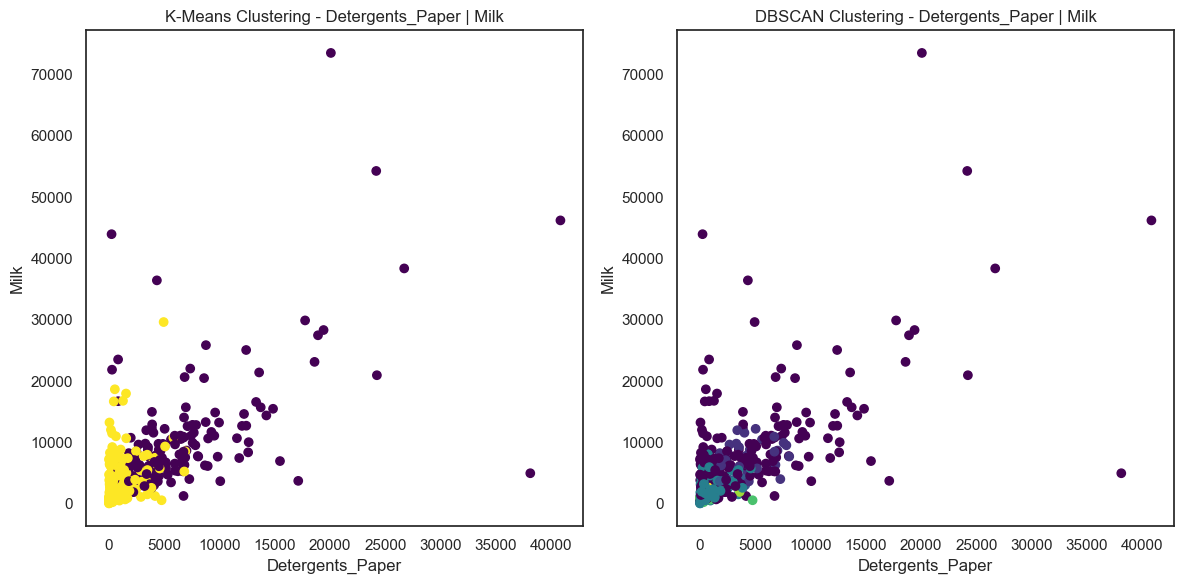

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Labels
axes[0].scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['label'], cmap='viridis')
axes[0].set_title('K-Means Clustering - Detergents_Paper | Milk')
axes[0].set_xlabel('Detergents_Paper')
axes[0].set_ylabel('Milk')
# Labels_DBSCAN
axes[1].scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN'], cmap='viridis')
axes[1].set_title('DBSCAN Clustering - Detergents_Paper | Milk')
axes[1].set_xlabel('Detergents_Paper')
axes[1].set_ylabel('Milk')
# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
# Mostrar los gráficos
plt.show();

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

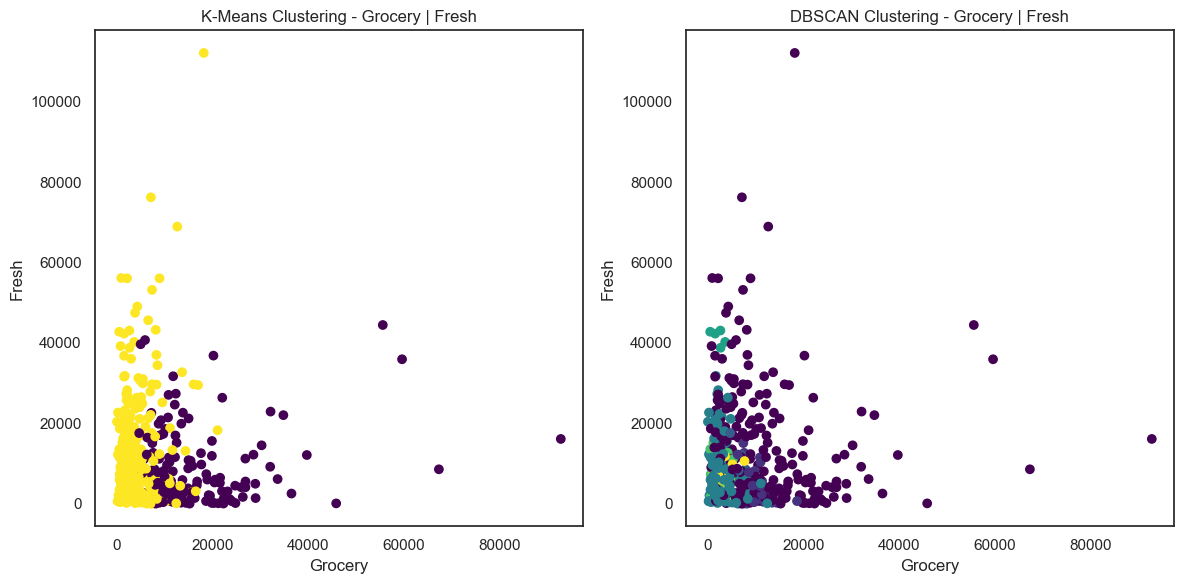

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Labels
axes[0].scatter(customers['Grocery'], customers['Fresh'], c=customers['label'], cmap='viridis')
axes[0].set_title('K-Means Clustering - Grocery | Fresh')
axes[0].set_xlabel('Grocery')
axes[0].set_ylabel('Fresh')
# Labels_DBSCAN
axes[1].scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN'], cmap='viridis')
axes[1].set_title('DBSCAN Clustering - Grocery | Fresh')
axes[1].set_xlabel('Grocery')
axes[1].set_ylabel('Fresh')
# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
# Mostrar los gráficos
plt.show();

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

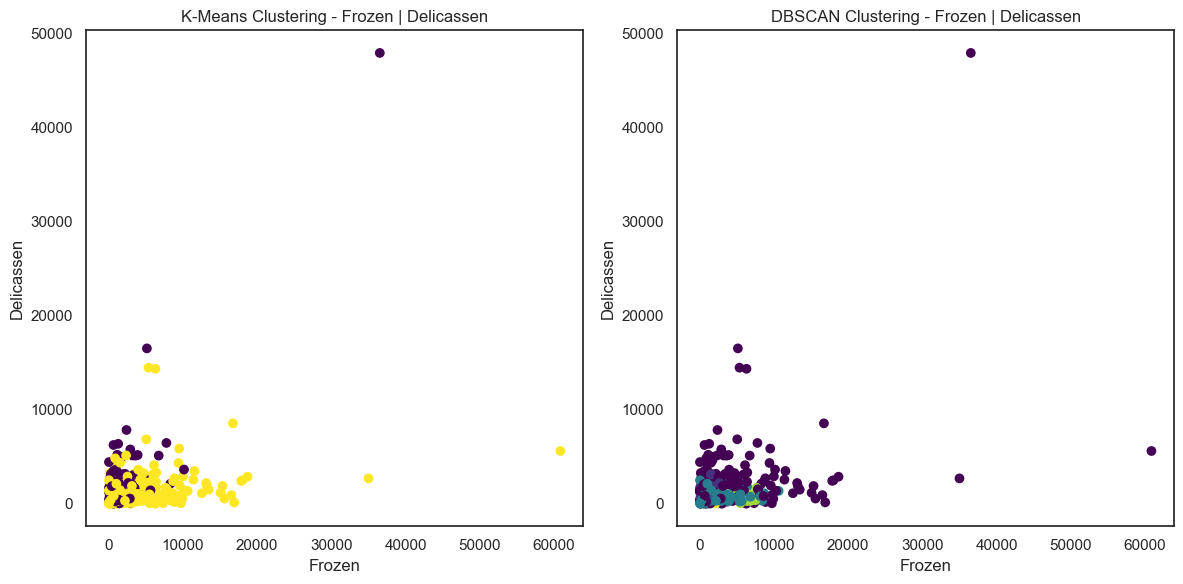

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Labels
axes[0].scatter(customers['Frozen'], customers['Delicassen'], c=customers['label'], cmap='viridis')
axes[0].set_title('K-Means Clustering - Frozen | Delicassen')
axes[0].set_xlabel('Frozen')
axes[0].set_ylabel('Delicassen')
# Labels_DBSCAN
axes[1].scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels_DBSCAN'], cmap='viridis')
axes[1].set_title('DBSCAN Clustering - Frozen | Delicassen')
axes[1].set_xlabel('Frozen')
axes[1].set_ylabel('Delicassen')
# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
# Mostrar los gráficos
plt.show();

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [79]:
# Your code here:
grouped = customers.groupby(['label', 'labels_DBSCAN']).mean()
grouped

Channel    Region         Fresh          Milk  \
label labels_DBSCAN                                                   
0     -1             1.971698  2.471698  10106.839623  12701.160377   
       0             2.000000  3.000000   4580.290323   7785.032258   
       1             2.000000  3.000000  12530.857143   3213.000000   
1     -1             1.008621  2.327586  19180.715517   5100.051724   
       2             1.000000  3.000000   8835.507246   2004.289855   
       3             1.000000  3.000000  41446.600000   1421.200000   
       4             1.000000  1.000000   9491.391304   1700.782609   
       5             1.000000  1.000000   7059.000000   1941.285714   
       6             1.000000  2.000000   8555.714286   1742.285714   

                          Grocery       Frozen  Detergents_Paper   Delicassen  
label labels_DBSCAN                                                            
0     -1             18847.556604  2287.283019       8208.641509  2418.198113  
       0             10442.096774   803.354839       4613.419355  1400.516129  
       1              6117.857143   868.571429       2879.571429   350.857143  
1     -1              5614.413793  5909.637931       1076.974138  2043.086207  
       2              2751.543478  2100.775362        629.253623   740.869565  
       3              2167.600000  1276.400000        416.200000   784.800000  
       4              2092.565217  1488.695652        526.478261   648.782609  
       5              2302.714286  6526.571429        844.571429   667.000000  
       6              4017.142857  2354.428571        385.714286   855.571429

Which algorithm appears to perform better?

**Your observations here**

 Me cuesta un poco ver cual de los dos modelos clusteriza mejor a traves de sus medias. Si fuera por los graficos diria que kmeans funciona mejor, aunque si fuera por la diferencia de medias podria ser DBSCAN. Para mi ninguno de los dos esta haciendo buenos clusters. 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

**Your comment here**

Segun puedo ver, 2 clusters parecen funcionar mejor.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

+ 
+ 
+ 
